# 1. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import seaborn as sns

# 2. Load and Explore the Penguins Dataset

In [19]:
# Load the Penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Preview the data
print("First few rows:")
print(penguins.head())

# Drop rows with missing data (NaNs)
penguins.dropna(inplace=True)

# Focus on two species only: Adelie and Gentoo
penguins = penguins[penguins['species'].isin(['Adelie','Gentoo'])]

print("\nDataset Preview (after filtering for Adelie/Gentoo):")
print(penguins.head())
print(f"\nNumber of rows after filtering: {len(penguins)}")

First few rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Dataset Preview (after filtering for Adelie/Gentoo):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7   

# 3. Data Preprocessing

In [4]:
# We'll use the following numeric features for classification:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
X = penguins[features]

# Our target will be species: map to binary (0 = Adelie, 1 = Gentoo)
y = penguins['species'].map({'Adelie':0, 'Gentoo':1})

# 4. Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (185, 4)
Test set size: (80, 4)


# 5. Model Training

In [6]:
# 5a. Naive Bayes (Generative Model)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5b. Logistic Regression (Discriminative Model)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 6. Predictions and Performance Metrics

In [7]:
# Predictions & probabilities on training data
nb_train_preds  = nb_model.predict(X_train)
lr_train_preds  = lr_model.predict(X_train)

nb_train_probs  = nb_model.predict_proba(X_train)[:,1]
lr_train_probs  = lr_model.predict_proba(X_train)[:,1]

# Predictions & probabilities on test data
nb_test_preds   = nb_model.predict(X_test)
lr_test_preds   = lr_model.predict(X_test)

nb_test_probs   = nb_model.predict_proba(X_test)[:,1]
lr_test_probs   = lr_model.predict_proba(X_test)[:,1]

# 7. Accuracy Comparison

In [8]:
nb_train_acc = accuracy_score(y_train, nb_train_preds)
nb_test_acc  = accuracy_score(y_test, nb_test_preds)

lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc  = accuracy_score(y_test, lr_test_preds)

print("\n=== Accuracy Scores ===")
print(f"Naive Bayes - Training Accuracy: {nb_train_acc:.3f}")
print(f"Naive Bayes - Test Accuracy:     {nb_test_acc:.3f}")
print(f"Logistic Reg - Training Accuracy: {lr_train_acc:.3f}")
print(f"Logistic Reg - Test Accuracy:     {lr_test_acc:.3f}")


=== Accuracy Scores ===
Naive Bayes - Training Accuracy: 1.000
Naive Bayes - Test Accuracy:     1.000
Logistic Reg - Training Accuracy: 1.000
Logistic Reg - Test Accuracy:     1.000


# 8. AUC (Area Under the ROC Curve) Comparison

In [9]:
nb_train_auc = roc_auc_score(y_train, nb_train_probs)
nb_test_auc  = roc_auc_score(y_test, nb_test_probs)

lr_train_auc = roc_auc_score(y_train, lr_train_probs)
lr_test_auc  = roc_auc_score(y_test, lr_test_probs)

print("\n=== AUC Scores ===")
print(f"Naive Bayes - Training AUC: {nb_train_auc:.3f}")
print(f"Naive Bayes - Test AUC:     {nb_test_auc:.3f}")
print(f"Logistic Reg - Training AUC: {lr_train_auc:.3f}")
print(f"Logistic Reg - Test AUC:     {lr_test_auc:.3f}")


=== AUC Scores ===
Naive Bayes - Training AUC: 1.000
Naive Bayes - Test AUC:     1.000
Logistic Reg - Training AUC: 1.000
Logistic Reg - Test AUC:     1.000


# 9. Lift and Gain Charts

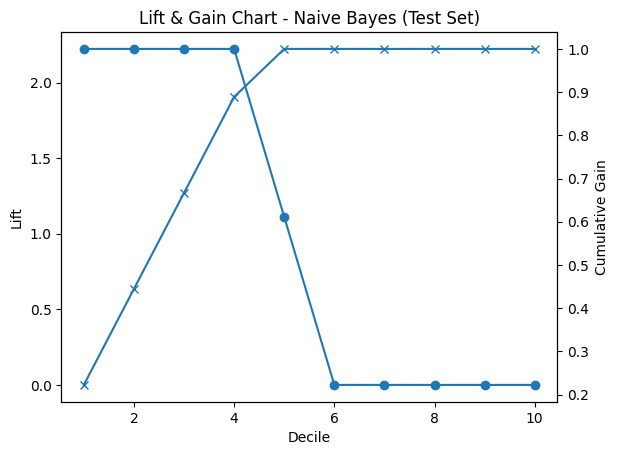

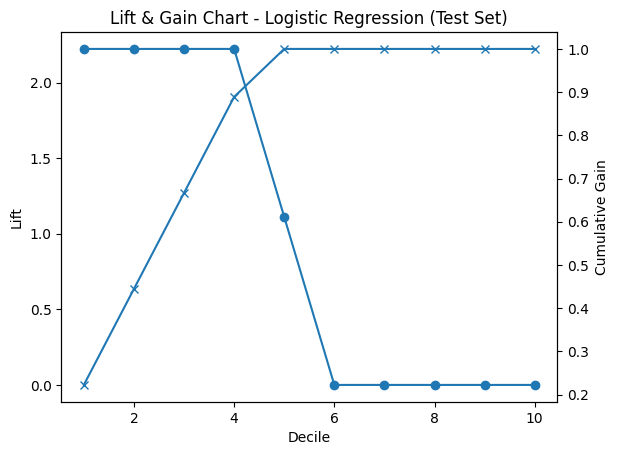

In [10]:
def calculate_lift_gain(y_true, y_prob, n_deciles=10):
    """
    Given true labels (y_true) and predicted probabilities (y_prob),
    this function returns a DataFrame containing deciles, the fraction
    of total instances in each decile, the fraction of positives in each
    decile, cumulative gain, lift, etc.
    """
    # Create a temporary dataframe for sorting and grouping
    temp_df = pd.DataFrame({'y_true':y_true, 'y_prob':y_prob})
    # Sort by predicted probability descending
    temp_df.sort_values('y_prob', ascending=False, inplace=True)
    temp_df.reset_index(drop=True, inplace=True)

    # Assign deciles
    temp_df['decile'] = pd.qcut(temp_df['y_prob'], q=n_deciles, labels=False, duplicates='drop')
    temp_df['decile'] = n_deciles - 1 - temp_df['decile']

    # Count total positives
    total_positives = temp_df['y_true'].sum()

    # Group by deciles
    grouped = temp_df.groupby('decile', as_index=False).agg({
        'y_true': ['sum','count']
    })
    grouped.columns = ['decile', 'positives', 'count']
    grouped.sort_values('decile', inplace=True)

    # Calculate fraction of positives in each decile
    grouped['perc_positives'] = grouped['positives'] / total_positives

    # Cumulative gain = cumulative fraction of total positives up to that decile
    grouped['cumulative_gain'] = grouped['perc_positives'].cumsum()

    # Lift = ratio of the fraction of positives in that decile
    # to the average fraction of positives in the entire dataset
    total_population = len(y_true)
    overall_positive_rate = total_positives / total_population
    grouped['lift'] = (grouped['positives'] / grouped['count']) / overall_positive_rate

    return grouped

def plot_lift_gain(df, model_name):
    """
    Plot Lift and Gain on dual y-axis with deciles on the x-axis.
    df must be the output from the 'calculate_lift_gain' function.
    """
    x = df['decile'] + 1

    fig, ax1 = plt.subplots()
    ax1.plot(x, df['lift'], marker='o')
    ax1.set_xlabel('Decile')
    ax1.set_ylabel('Lift')

    ax2 = ax1.twinx()
    ax2.plot(x, df['cumulative_gain'], marker='x')
    ax2.set_ylabel('Cumulative Gain')

    plt.title(f'Lift & Gain Chart - {model_name}')
    plt.show()

# Calculate Lift & Gain for NB (test set) & LR (test set)
nb_lift_gain_df = calculate_lift_gain(y_test, nb_test_probs, n_deciles=10)
lr_lift_gain_df = calculate_lift_gain(y_test, lr_test_probs, n_deciles=10)

# Plot NB Lift/Gain
plot_lift_gain(nb_lift_gain_df, 'Naive Bayes (Test Set)')

# Plot LR Lift/Gain
plot_lift_gain(lr_lift_gain_df, 'Logistic Regression (Test Set)')


## Penguins Results & Observations

- **Accuracy**: Both models show 100% accuracy on training and test sets, indicating perfect separability in these four numeric features for Adelie vs. Gentoo.
- **AUC**: Also 1.0 for both models, reflecting perfect ranking of the two classes.
- **Lift & Gain**:
  - The very high lift in the first deciles means the model places almost all *Gentoo* instances at the top of the predicted probability range.
  - Cumulative Gain rapidly reaches 100%, confirming perfect or near perfect ranking.

**Why Perfect Separation?**
Adelie and Gentoo are very distinct in flipper length, body mass, and bill measurements. Even a simple linear boundary or naive assumptions allow the models to classify them perfectly.

#MNIST Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# MNIST data from sklearn
from sklearn.datasets import fetch_openml

# 1a. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Features: 70,000 x 784
X = mnist.data
# Targets: 70,000 labels in string form 0-9
y = mnist.target.astype(np.int64)  # convert to int for classification


In [12]:
subset_size = 25000
X_subset = X[:subset_size]
y_subset = y[:subset_size]

# Use a 80/20 train-test split within this subset
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (20000, 784)
Test set shape: (5000, 784)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_preds = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("\nLogistic Regression Accuracy:", lr_accuracy)

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, lr_preds))



Logistic Regression Accuracy: 0.8936
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       494
           1       0.94      0.94      0.94       570
           2       0.87      0.88      0.87       490
           3       0.88      0.86      0.87       518
           4       0.88      0.90      0.89       489
           5       0.87      0.85      0.86       447
           6       0.90      0.92      0.91       493
           7       0.91      0.90      0.90       519
           8       0.86      0.84      0.85       478
           9       0.87      0.88      0.87       502

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [15]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb_preds = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_preds)
print("\nMultinomialNB Accuracy:", mnb_accuracy)

print("Classification Report (MultinomialNB):")
print(classification_report(y_test, mnb_preds))



MultinomialNB Accuracy: 0.823
Classification Report (MultinomialNB):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       494
           1       0.89      0.92      0.90       570
           2       0.87      0.85      0.86       490
           3       0.75      0.81      0.78       518
           4       0.82      0.76      0.79       489
           5       0.84      0.62      0.71       447
           6       0.89      0.91      0.90       493
           7       0.94      0.83      0.88       519
           8       0.68      0.74      0.71       478
           9       0.68      0.82      0.75       502

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000



In [18]:
from sklearn.preprocessing import label_binarize

# Binarize the test labels (for multi-class AUC)
y_test_bin = label_binarize(y_test, classes=range(10))

# For logistic regression
lr_probs = lr.predict_proba(X_test_scaled)  # shape: [n_samples, 10 classes]
# Compute AUC
lr_auc = roc_auc_score(y_test_bin, lr_probs, average="macro", multi_class="ovr")
print("Logistic Regression AUC:", lr_auc)

# MultinomialNB
mnb_probs = mnb.predict_proba(X_test)
mnb_auc = roc_auc_score(y_test_bin, mnb_probs, average="macro", multi_class="ovr")
print("MultinomialNB AUC:", mnb_auc)


Logistic Regression AUC: 0.98908257486423
MultinomialNB AUC: 0.9167793693614608


## 6. MNIST Results & Observations

- **Logistic Regression**:
  - Accuracy ~ 89.36%
  - Macro-average AUC ~ 0.989
  - Strong performance across most digits, indicating robust discrimination in high-dimensional space.
  
- **MultinomialNB**:
  - Accuracy ~ 82.3%
  - Macro-average AUC ~ 0.917
  - Lower than logistic regression, possibly due to the naive assumption of feature independence and the complex pixel data.

**Interpretation**:
- MNIST is far more challenging than the Penguins dataset (10 classes vs. 2; 784 features vs. 4).
- Logistic Regression typically handles correlated features better and thus outperforms Naive Bayes on image data.
- Naive Bayes can still achieve decent performance (~82%) but doesn’t match the discriminative approach here.


## 7. Comparison & Final Conclusion

1. **Penguins (2-class, 4-feature)**:
   - Both Naive Bayes and Logistic Regression achieve **100% accuracy** and **AUC=1.0** due to simple, well-separated features.
   - Lift & Gain charts show perfect ranking, capturing all positives in the top decile.

2. **MNIST (10-class, 784-feature)**:
   - Logistic Regression outperforms Naive Bayes (89.36% vs. 82.3% accuracy, 0.989 vs. 0.917 macro-AUC).
   - The assumption of conditional independence in Naive Bayes is less suitable for highly correlated pixel data.

**Key Takeaways**:
- **Generative vs. Discriminative**: On straightforward tasks (like two easily separable species), both can do perfectly well.
- **Complex, High-Dimensional Data**: Discriminative models often handle correlated features better, giving logistic regression a performance edge on MNIST.
- **Model Selection**: Simple tasks or specific feature distributions (e.g., text counts) can benefit from Naive Bayes speed and simplicity. Complex tasks with correlated features are often better served by logistic regression or other discriminative methods.

**End of Assignment**.
